In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import math
from scipy.optimize import curve_fit
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 500

base_path = "/content/drive/MyDrive/Y2/PHY293/PHY293-Labs/ThermalMotion/processed_data"

data = {}

for i in os.listdir(base_path):
    data[i.split('.')[0]] = pd.read_csv(os.path.join(base_path, i))


In [ ]:
data['d1']

,X,Y
0,612.39,638.73
1,609.99,640.45
2,606.29,637.58
3,605.80,642.24
4,602.43,640.25
...,...,...
115,635.71,638.67
116,634.40,631.23
117,632.05,630.59
118,634.74,625.89


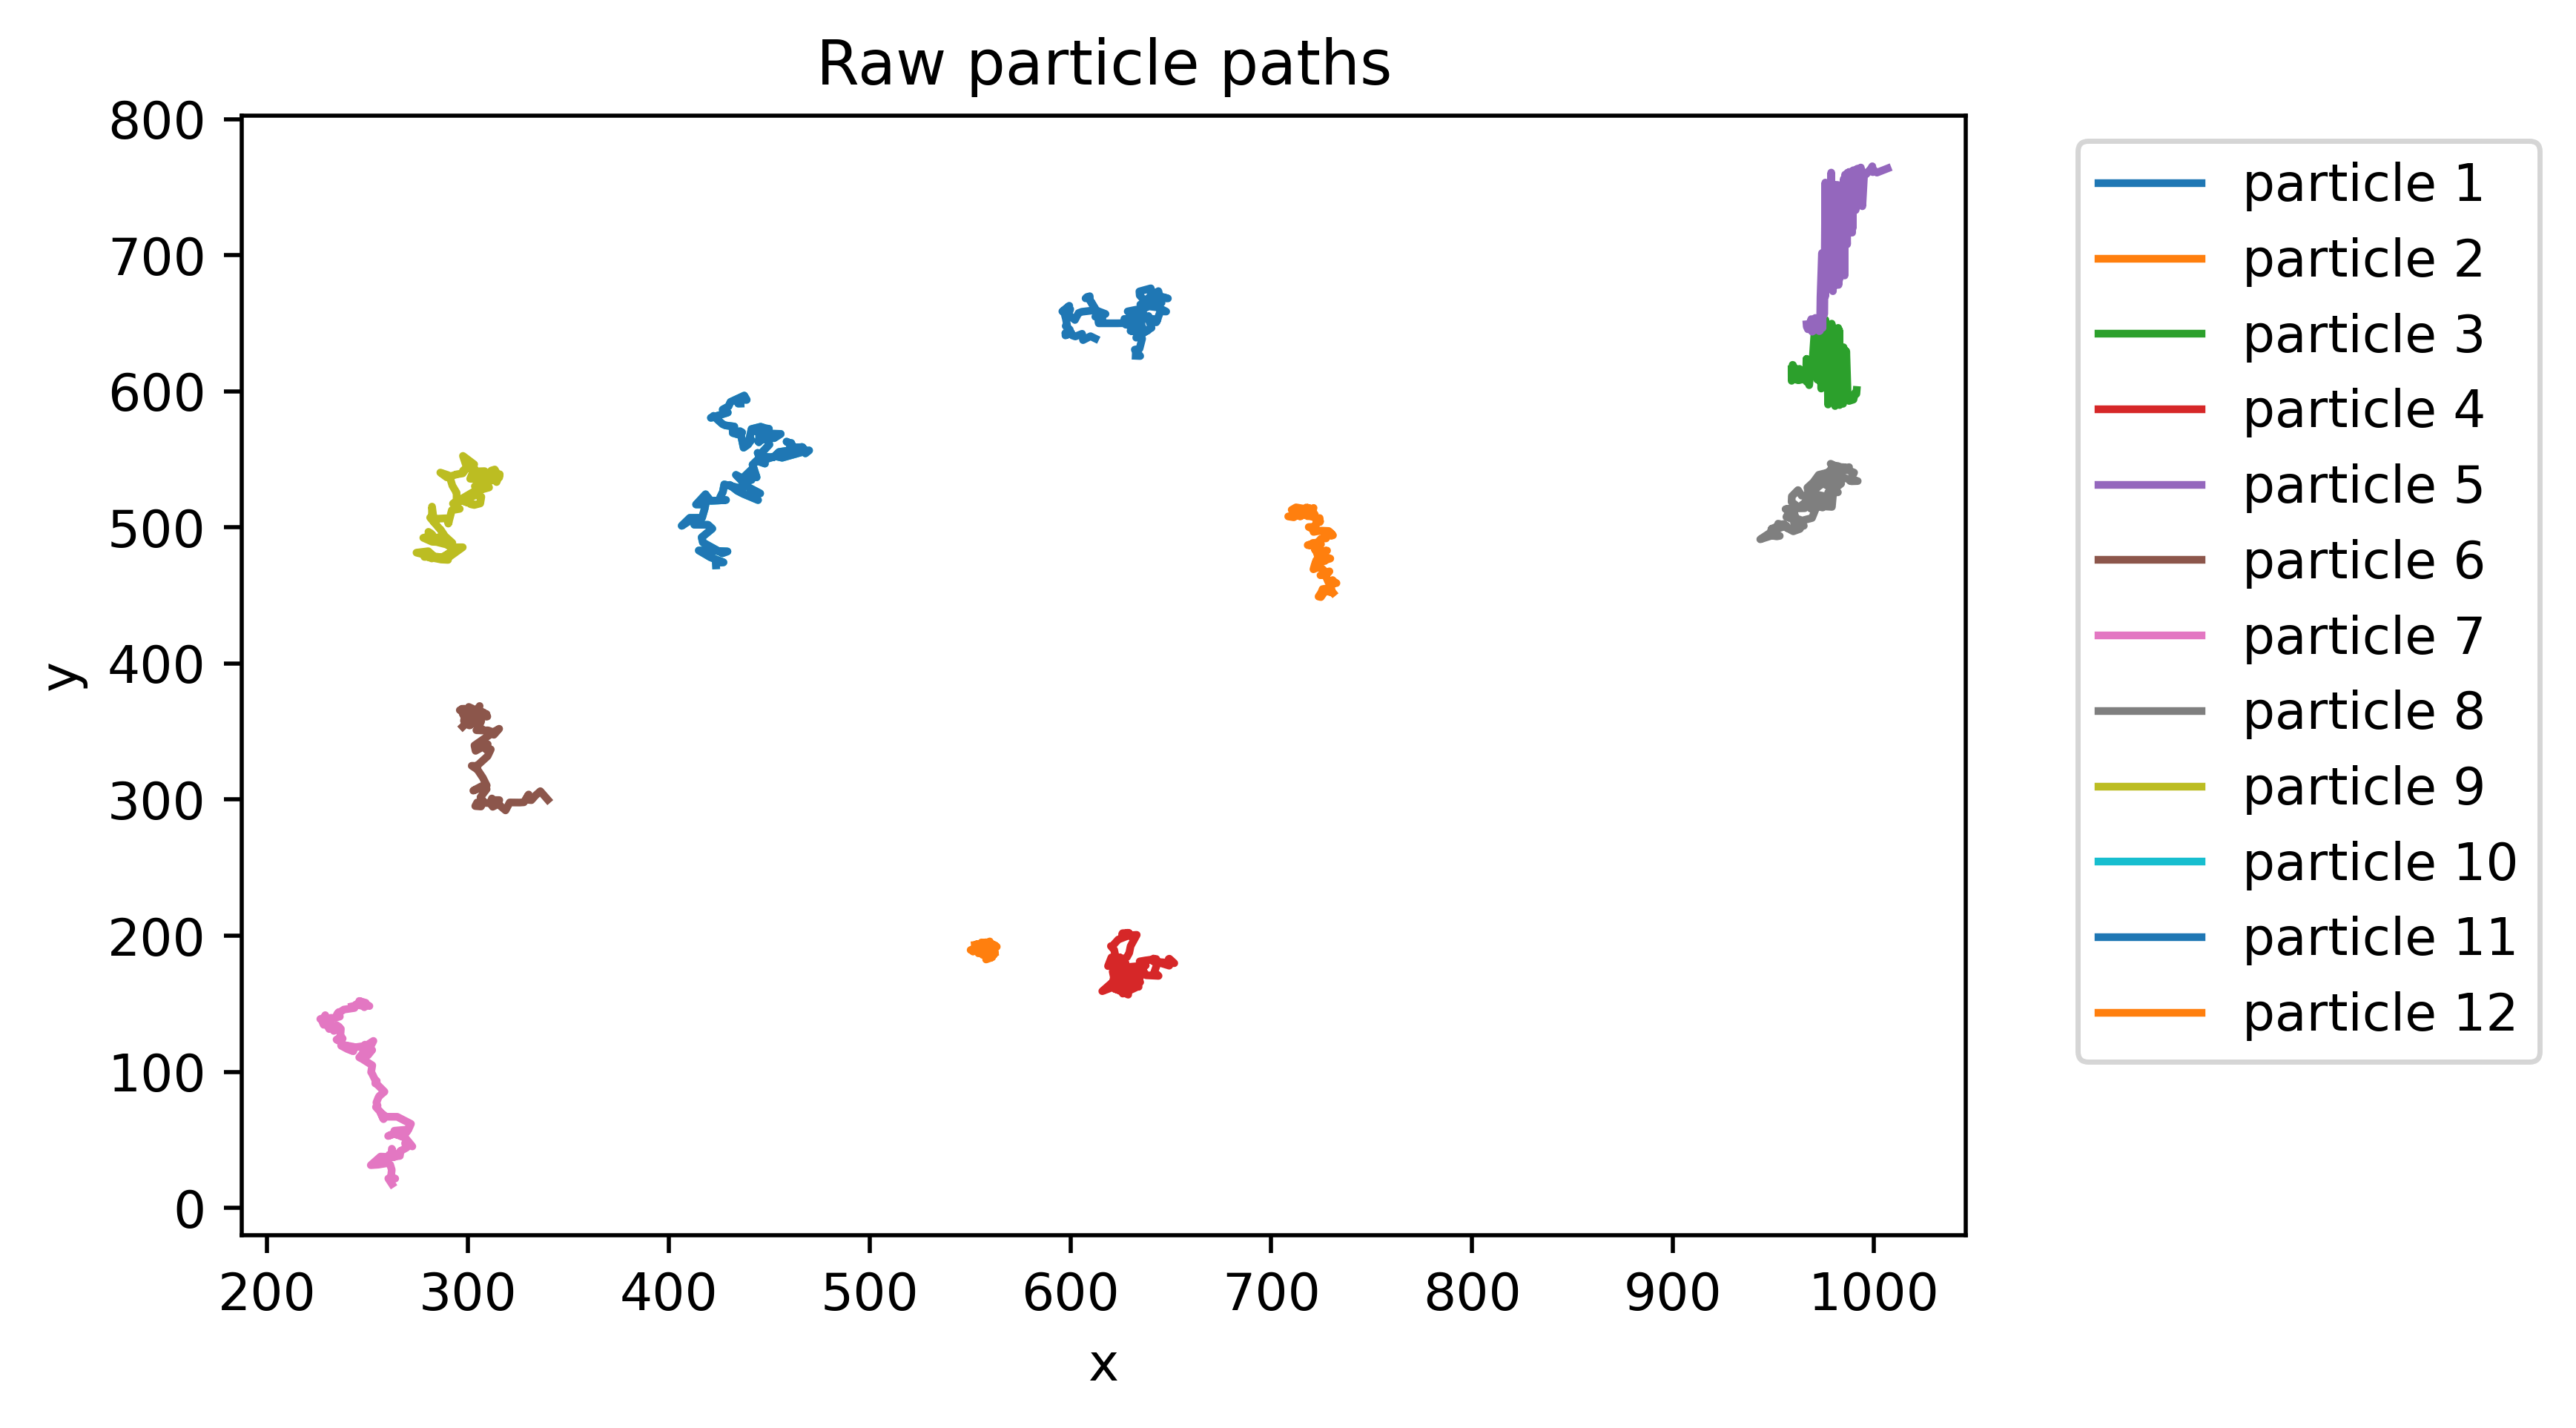

In [ ]:
for i in sorted([int(i[1:]) for i in list(data.keys())]):
    i = f"d{i}"
    plt.plot(data[i].X, data[i].Y, label=f"particle {i[1:]}")
# plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title("Raw particle paths")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.show()



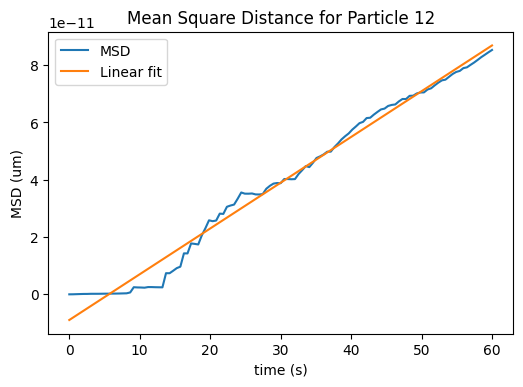

12
8.08304016593556e-14 +\- 2.0264145480101825e-15
4.6574423824842174e-15 +\- 1.477511571122637e-16
8.014427976627496e-14 +\- 1.0314104345569797e-15
4.6151348606267646e-14 +\- 1.1636234050061385e-15
7.988574445471827e-13 +\- 8.887126169066286e-15
4.40045243449534e-13 +\- 3.558462719479047e-15
9.038448127940629e-13 +\- 2.128101349064984e-14
1.3424741051677395e-13 +\- 2.5399286143702643e-15
2.6071396798431936e-13 +\- 7.311013899731942e-15
7.610741374124361e-13 +\- 5.749736984860055e-15
7.610741374124361e-13 +\- 5.749736984860055e-15
1.9436115805881376e-13 +\- 3.889897252213022e-15


In [ ]:

def calc_distance(x1, y1, x2, y2):
    # we know that 1 pixel = 0.1155um
    return (0.1155 * 1) * ((x1-x2)**2 + (y1-y2)**2)**0.5


dists = {}
for k in data.keys():
    dists[k] = []
    for i in range(len(data[k].X)-1):
        dists[k].append(calc_distance(data[k].X.iloc[i],
                                    data[k].Y.iloc[i],
                                    data[k].X.iloc[i+1],
                                    data[k].Y.iloc[i+1]
        ))

msd = {}

for k in data.keys():
    dt = data[k]
    msd[k] = []
    for i in range(1, len(dt)):    
        distance = calc_distance(
            dt.X.iloc[0:i],
            dt.Y.iloc[0:i],
            np.repeat(dt.X.iloc[0], i),
            np.repeat(dt.Y.iloc[0], i)
        )
        distance = distance * 1e-6 
        res = (1/(i+1)) * np.sum(distance**2)
        msd[k].append(res)
# plt.plot(dists)

xs = np.linspace(0, 60, 120-1)
res = []
for i in sorted([int(i[1:]) for i in list(msd.keys())]):
    i = f"d{i}"
    fit, cov = np.polyfit(xs, msd[i], 1, cov=True)
    f = np.poly1d(fit)
    error = cov[0][0]**0.5
    error = error/2
    D = fit[0]/(4*0.5)
    res.append((D, error))
    plt.plot(xs, msd[i], label=f"particle {i[1:]}")
    # from code below with the distributions
 

plt.legend()
plt.title(f"Mean Square Distance for Particle {i[1:]}")
plt.xlabel("time (s)")
plt.ylabel("MSD (um)")
plt.show()

print(len(res))

for i in res:
    print(f"{i[0]} +\- {i[1]}")
    print(calc_k(i[0]))


In [ ]:
# just inspect the last data point and fit here
i = 'd12' 
plt.plot(xs, msd[i], label="MSD")
plt.plot(xs, f(xs), label="Linear fit")

array([7.76928893e-06, 1.18391648e-06, 1.31388062e-06, 3.66030686e-06,
       6.90270752e-06, 5.75590621e-06, 5.70880202e-06, 4.16244347e-06,
       5.40474270e-06, 2.51857629e-06, 7.78592629e-06, 3.99958769e-06,
       3.71968013e-06, 2.77489291e-06, 5.34232526e-06, 4.07312500e-06,
       1.27021817e-06, 4.72207230e-06, 1.88326956e-06, 5.65286260e-06,
       2.24508095e-06, 1.10278112e-05, 6.78656862e-06, 3.46005593e-06,
       6.11297218e-06, 2.59633833e-06, 6.07517719e-06, 3.12987004e-06,
       2.30053519e-06, 2.02848026e-06, 4.86975923e-06, 1.61535953e-06,
       1.84555752e-06, 3.53622607e-06, 7.00012255e-06, 7.67632063e-06,
       2.29902004e-06, 7.11290541e-06, 5.86053214e-06, 1.49165234e-07,
       9.69148623e-06, 2.43678547e-06, 2.39129456e-06, 2.35848166e-06,
       7.92974087e-06, 1.34227897e-05, 3.61008205e-06, 4.89431822e-06,
       4.11191428e-06, 7.40545447e-07, 1.15885543e-05, 4.66346742e-06,
       1.38348508e-06, 1.68897002e-06, 2.90081797e-06, 5.37538456e-06,
      

/home/ihasdapie/.local/lib/python3.9/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


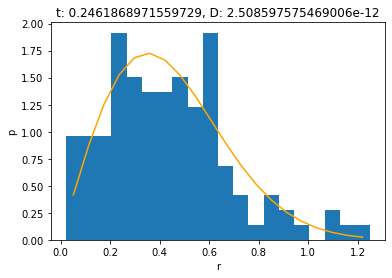

Results of k for data file d1.csv
With fit: 3.030128348685841e-20
With estimate: 1.2571638698690256e-21


In [ ]:
run='d1'
def calc_D_as_sum(R, t):
    N = len(R)
    R = np.array(R) * 10e-6
    return np.sum(np.array(R)**2)/(4*N*t)

def rayleigh_dist(r, t, D):
    return (r/(2*D*t))*np.exp(-1*((r**2)/(4*D*t)))

# code to extract bins from plt.hist from https://stackoverflow.com/questions/65116839/rayleigh-distribution-curve-fit-on-python
hist_values, bin_edges, patches = plt.hist(dists[run], bins=20, density=True)

bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
popt, pcov = curve_fit(rayleigh_dist, bin_centers, hist_values)

plt.plot(bin_centers, rayleigh_dist(bin_centers, *popt), label='PDF', color='orange')
plt.xlabel("r")
plt.ylabel("p")


# need to scale D that we got here to be in meters
D = popt[1] * 10e-12


plt.title(f"t: {popt[0]}, D: {D}")
plt.show()

# Given D we can calculate k using eistein's relation
# so k = (D*gamma)/T

print(f"Results of k for data file {run}.csv")
print(f"With fit: {calc_k(D)}")
print(f"With estimate: {calc_k(calc_D_as_sum(dists[run], 60))}") # we know that there are always 120 data points @ 0.5Hz, final time = 60s



Num bins: [0.23723857 0.10072005]


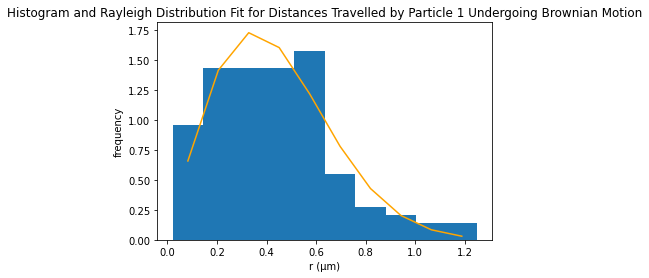

Results of k for data file d1.csv
With fit D = 1.2203161058272335e-12 +/- 2.3854127368042674e-13: 1.474016583123616e-20
With estimate D = 1.2489444167426491e-11: 1.508596643842831e-19
Num bins: [0.27464327 0.12491303]


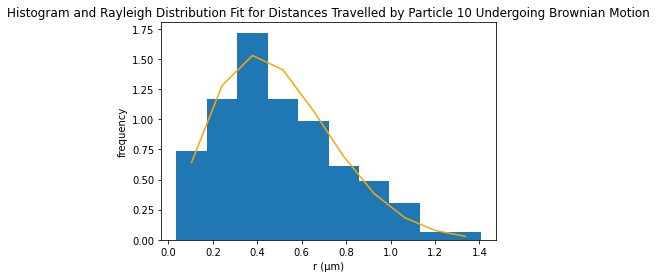

Results of k for data file d10.csv
With fit D = 1.5677101992647959e-12 +/- 1.4565137413368702e-13: 1.8936329859236438e-20
With estimate D = 1.6597969167943404e-11: 2.0048642874493696e-19
Num bins: [0.27464327 0.12491303]


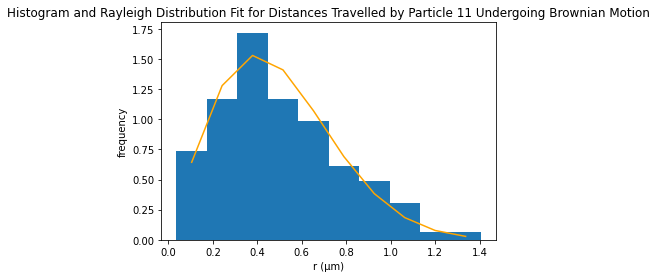

Results of k for data file d11.csv
With fit D = 1.5677101992647959e-12 +/- 1.4565137413368702e-13: 1.8936329859236438e-20
With estimate D = 1.6597969167943404e-11: 2.0048642874493696e-19
Num bins: [0.14953578 0.07413607]


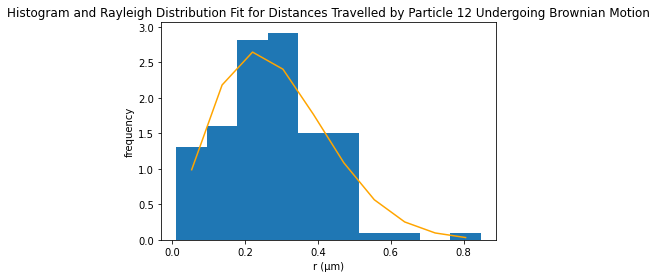

Results of k for data file d12.csv
With fit D = 5.251215841554083e-13 +/- 1.3591568081547171e-14: 6.342929668018328e-21
With estimate D = 4.700326354906806e-12: 5.677511720234966e-20
Num bins: [0.1318745  0.07163777]


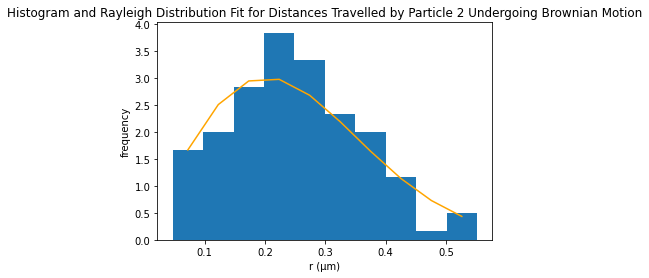

Results of k for data file d2.csv
With fit D = 4.074583591521623e-13 +/- 3.887306463112499e-15: 4.9216786982868475e-21
With estimate D = 3.818277183308849e-12: 4.6120868685450163e-20
Num bins: [1.30969175 0.19300374]


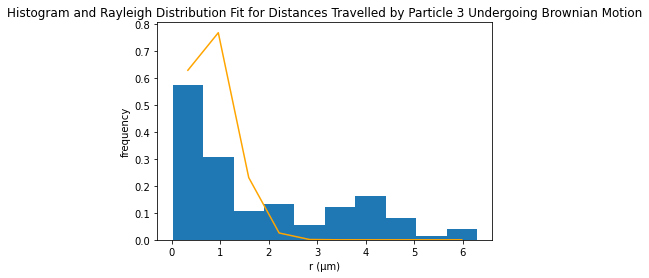

Results of k for data file d3.csv
With fit D = 4.681595706370667e-12 +/- 2.2870625009823164e-09: 5.654887019615929e-20
With estimate D = 2.977381607123881e-10: 3.596371335452304e-18
Num bins: [0.26465857 0.09184812]


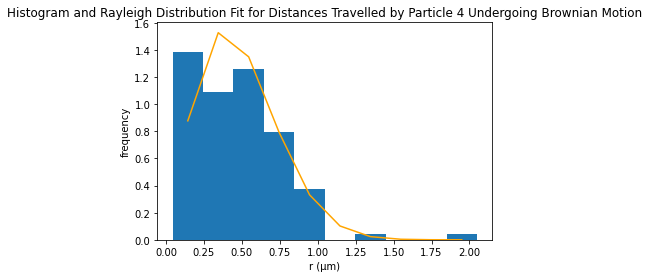

Results of k for data file d4.csv
With fit D = 1.529311960956747e-12 +/- 2.3873377383385246e-12: 1.8472518558553584e-20
With estimate D = 1.6040868292869245e-11: 1.9375722207126679e-19
Num bins: [1.55107041 0.18752427]


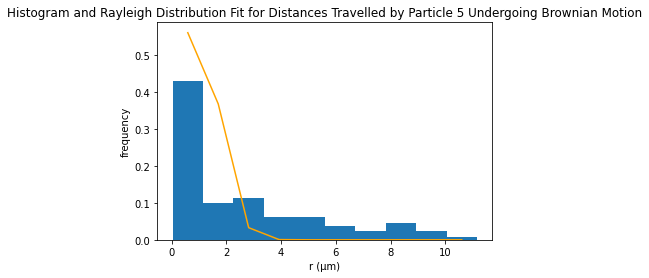

Results of k for data file d5.csv
With fit D = 8.597410194783766e-12 +/- 1.0181488036604549e-08: 1.0384788939941641e-19
With estimate D = 6.826573344722597e-10: 8.245799812016375e-18
Num bins: [0.18325559 0.0522364 ]


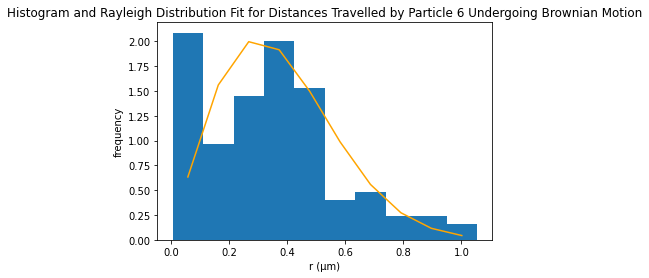

Results of k for data file d6.csv
With fit D = 9.019467841990995e-13 +/- 2.146532834883206e-12: 1.0894591251036984e-20
With estimate D = 8.533126257816335e-12: 1.0307140543213948e-19
Num bins: [0.20961238 0.0906233 ]


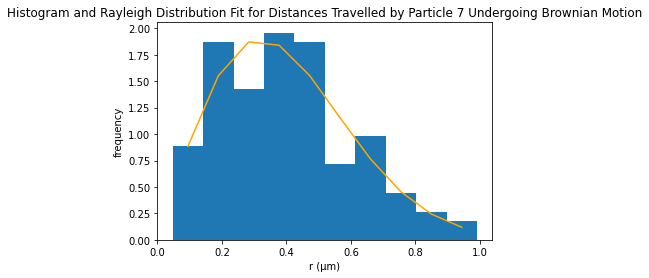

Results of k for data file d7.csv
With fit D = 1.021285812943974e-12 +/- 1.4520365776804572e-13: 1.2336084209654997e-20
With estimate D = 1.0093410524652039e-11: 1.2191803765079438e-19
Num bins: [0.28573448 0.12804479]


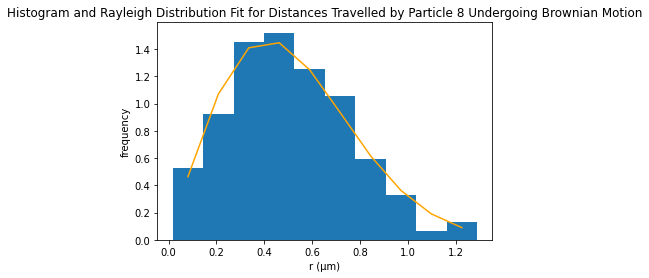

Results of k for data file d8.csv
With fit D = 1.7119471753955648e-12 +/- 3.511841150748229e-14: 2.0678564463050304e-20
With estimate D = 1.6292227402536804e-11: 1.967933820809555e-19
Num bins: [0.24779286 0.09351189]


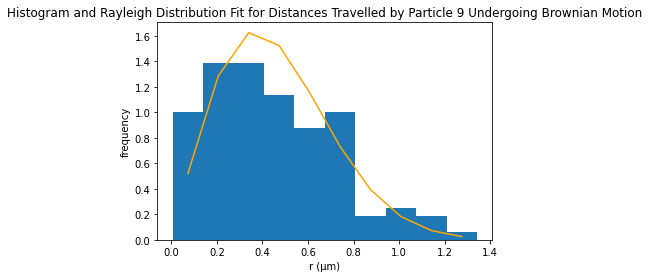

Results of k for data file d9.csv
With fit D = 1.3748688502732749e-12 +/- 1.2981459378067767e-12: 1.6607004326547994e-20
With estimate D = 1.3780958532784168e-11: 1.6645983210139349e-19


In [ ]:
# jason's method
def calc_D_as_sum(R, t):
    N = len(R)
    R = np.array(R) * 10e-6
    return np.sum(np.array(R)**2)/(4*N*t)

def rayleigh_dist3(r, D):
    # this doesn't make full sense to me because why are we fitting for t?
    return (r/(2*D*0.5))*np.exp(-1*((r**2)/(4*D*0.5)))

def calc_k(D):
    # viscosity of water, bead diameter is given
    # viscoscity 1g/cm*s = 0.001kg/cm*s = 0.1 kg/m*s
    return (D*6*math.pi*0.1*(1.9e-6))/(296.5)

Ds = {}

res = []

def get_k(run):
    # num bins as interquartile range
    num_bins = (2 * np.percentile(dists[run], [75, 25]))/(len(dists[run]) ** (1/3))
    
    print(f"Num bins: {num_bins}")
    hist_values, bin_edges, patches = plt.hist(dists[run], density=True)
    bin_centers = (bin_edges[1:] + bin_edges[:-1])/2
    popt, pcov = curve_fit(rayleigh_dist3, bin_centers, hist_values)
    D = popt[0] * 10e-12
    
    plt.plot(bin_centers, rayleigh_dist3(bin_centers, *popt), label='PDF', color='orange')
    plt.xlabel("r (μm)")
    plt.ylabel("frequency")
    unc = (pcov[0][0]**2)*10e-6
    
    # need to scale D that we got here to be in meters
    # Diffusion coefficient has units of area per time (m2/s)
    plt.title(f"Histogram and Rayleigh Distribution Fit for Distances Travelled by Particle {i[1:]} Undergoing Brownian Motion")
    plt.show()
    
    # Given D we can calculate k using eistein's relation
    # so k = (D*gamma)/T
    # res.append((D, unc))
    D_time = calc_D_as_sum(dists[run], 0.5)
    res.append((D_time, calc_k(D_time)))
    
    print(f"Results of k for data file {run}.csv")
    print(f"With fit D = {D} +/- {unc}: {calc_k(D)}")
    print(f"With estimate D = {D_time}: {calc_k(D_time)}") # we know that there are always 120 data points @ 0.5Hz, final time = 60s
    Ds[run] = (D, D_time)    
    
for i in sorted(list(data.keys())):
    get_k(i)




